In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

2024-03-11 12:03:13.053140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#!python3 -m pip install tensorflow[and-cuda]
#!pip install --upgrade pip

In [3]:
# print available GPUs. If so, run using that.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h3> The objective of this code is make a classification using neural networks, useful to find hidden patterns in data. <h3>

In [4]:
# Generate dispersed points for two concentric circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)

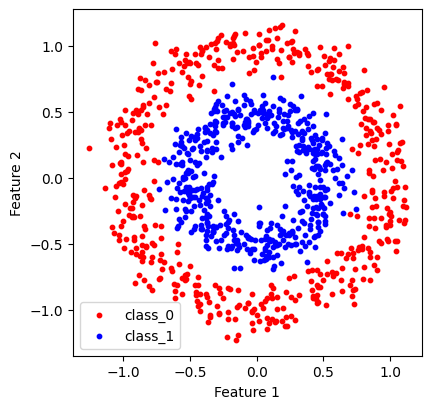

In [5]:
# Plot the generated data
plt.figure(figsize=(4.5, 4.5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], s=10, color='red',  label='class_0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=10, color='blue', label='class_1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
#plt.grid(True)
plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define the model
model = Sequential()

optimizer = Adam(learning_rate=0.001,)

model.add(Dense(64, input_shape=(2,), activation='relu'))  # Hidden layer with 64 units and ReLU activation. Imput shape 2 features
model.add(Dense(32, activation='relu'))                    # Hidden layer with 32 units and ReLU activation
model.add(Dense(1,  activation='sigmoid'))                 # Output layer with 1 unit and Sigmoid activation (binary classification)

# Compile the model
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15


I0000 00:00:1710180195.265237   15402 service.cc:145] XLA service 0x73b8e80014c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710180195.265266   15402 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1


 1/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5625 - loss: 0.6973

I0000 00:00:1710180196.015658   15402 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5118 - loss: 0.6868 - val_accuracy: 0.4688 - val_loss: 0.6745
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4899 - loss: 0.6621 - val_accuracy: 0.4688 - val_loss: 0.6561
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5193 - loss: 0.6285 - val_accuracy: 0.5000 - val_loss: 0.6343
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5195 - loss: 0.6124 - val_accuracy: 0.5750 - val_loss: 0.6004
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6372 - loss: 0.5654 - val_accuracy: 0.7688 - val_loss: 0.5543
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.5294 - val_accuracy: 0.8875 - val_loss: 0.4929
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9161 - loss: 0.4598 - val_accuracy: 0.9500 - val_loss: 0.4189
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.3904 - val_accuracy: 0.9688 - val_loss: 0.3431
Ep

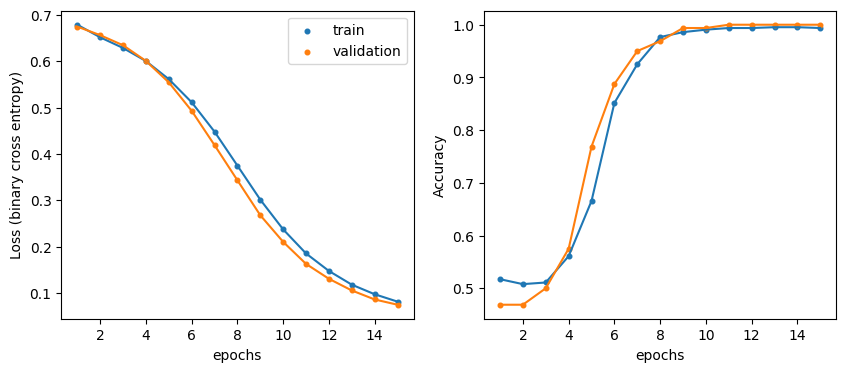

In [9]:
# for the training sample
history_loss_train = history.history['loss']
history_accuracy_train = history.history['accuracy']

# for the validation (20% from train) sample
history_loss_val = history.history['val_loss']
history_accuracy_val = history.history['val_accuracy']

# epochs array
epochs = range(1, len(history_loss_train)+1)

# create figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].scatter(epochs, history_loss_train, s=11)
ax[0].scatter(epochs, history_loss_val,   s=11)

ax[0].plot(epochs, history_loss_train)
ax[0].plot(epochs, history_loss_val)

ax[1].scatter(epochs, history_accuracy_train, s=11)
ax[1].scatter(epochs, history_accuracy_val,   s=11)

ax[1].plot(epochs, history_accuracy_train)
ax[1].plot(epochs, history_accuracy_val)

ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")

ax[0].set_ylabel("Loss (binary cross entropy)")
ax[1].set_ylabel("Accuracy")

ax[0].legend(["train", "validation"])
plt.show()

We can observe that epochs=10, the curves converges.
On the other hand, the train and validation curves keep close even when epochs increases, which means that there is not overffiting presented.

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9779 - loss: 0.1162
Test Loss: 0.12021138519048691, Test Accuracy: 0.9800000190734863


In [11]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

df = pd.DataFrame()
df['X1_test'] = X_test[:,0]
df['x2_test'] = X_test[:,1]
df['y_pred_prob'] = predictions
df['y_pred'] = predicted_classes
df['y'] = y_test
df

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,X1_test,x2_test,y_pred_prob,y_pred,y
0,-0.183067,0.390134,0.976113,1,1
1,0.168505,0.869701,0.145476,0,0
2,-0.370716,-0.151243,0.976180,1,1
3,-0.174255,1.020947,0.023949,0,0
4,0.180431,-0.649801,0.719335,1,1
...,...,...,...,...,...
195,0.682261,0.593896,0.115040,0,0
196,-0.445419,0.094120,0.971606,1,1
197,0.862200,-0.094400,0.153993,0,0
198,-0.321888,0.404748,0.957714,1,1


In [12]:
def boundary_plot(X_, y_, model, nature:str='test'):

    """
    :param X_: X_train or X_test
    :param y_: y_train or y_test
    :param model: constructed neural network
    :param nature: 'test' or 'train'
    :return: None
    """

    # Generate a grid of points covering the feature space
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make predictions on the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(grid_points)
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(6.5, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.3)

    # Plot the training data points
    plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    plt.title(f'Decision Boundary Plot for the {nature} sample')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


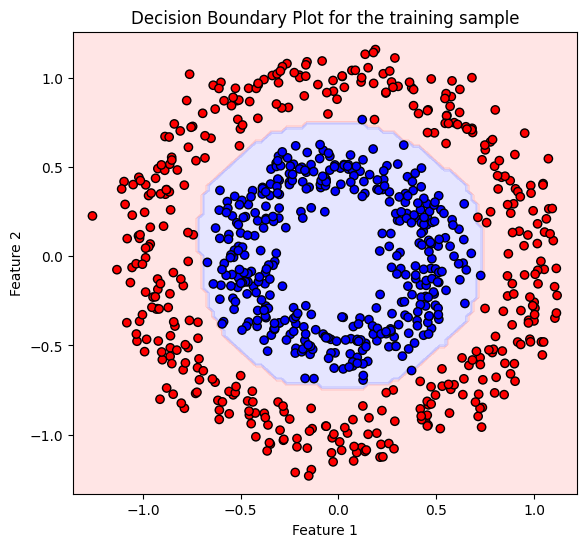

In [13]:
# plot for the training sample
boundary_plot(X_train, y_train, model, nature='training')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


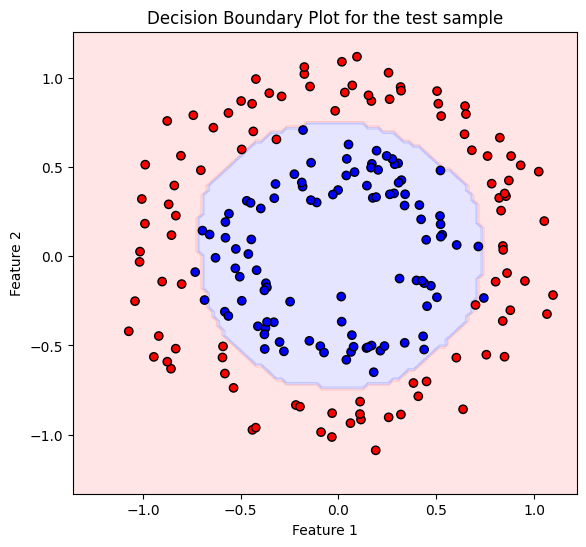

In [14]:
# plot for the test sample
boundary_plot(X_test, y_test, model, nature='test')